In [9]:
import folium
import pandas as pd
import re
from datetime import datetime as dt
import numpy as np

import vacija as va

print(va.k_amo)


{'panel': (0.7, ('панел',)), 'brick': (1.0, ('кирпич', 'кирич', 'кирпин')), 'monolit': (1.5, ('монолит',)), 'block': (1, ('блоч', 'газобетон', 'шлак', 'газосили')), 'log': (0.22, ('дерев', 'бревен', 'щитов')), 'clay': (0.33, ('глин',)), 'carcas': (0.66, ('саман', 'каркасно-засыпной')), 'mixt': (0.7, ('смешан',)), 'other': (1, ('иные',)), 'bad_series': (0.3, ('К-7', 'K-7', 'К-6', 'K-6', '1605-AM/5', '1605-AM/5', 'II-32', 'II-35', '1605-AM', '1605-AM', '1-МГ-300', '1-MГ-300'))}


In [15]:
#dtfHouses=pd.read_csv(r'/home/egor/data/Houses/vlad_obl_houses.csv', encoding='cp1251', sep=';', index_col='id')
#dtfHouses=pd.read_csv(r'Houses/vlad_obl_houses.csv', encoding='cp1251', sep=';', index_col='id')
#dtfHouses=pd.read_csv(r'Houses/tula_houses.csv', encoding='cp1251', sep=';', index_col='id')
#dtfHouses=pd.read_csv(r'Houses/piter_houses.csv', encoding='cp1251', sep=';', index_col='id')
dtfMos=pd.read_csv(r'Houses/moscow_houses.csv', encoding='cp1251', sep=';', index_col='id')
dtfMosobl=pd.read_csv(r'Houses/mos_obl_houses.csv', encoding='cp1251', sep=';', index_col='id')

print(dtfMos.columns.tolist())

['address', 'year', 'base_type', 'build_year', 'cesspools_volume', 'cold_water_type', 'common_hold_square', 'electo_type', 'electro_inputs', 'elevators', 'energo_class', 'entrance', 'ext_info', 'face_type', 'fire_exting_type', 'floors', 'floors_min', 'garbage_chute_count', 'garbage_chute_type', 'gas_supply_type', 'gutter_type', 'hot_water_type', 'kap_rem_fund', 'land_plot_area', 'latitude', 'living_rooms', 'living_square', 'longtitude', 'manager', 'not_living_rooms', 'not_living_square', 'other', 'overlap_type', 'parking_area', 'playground', 'roof_type', 'roofing_type', 'rooms', 'seria', 'sportground', 'square', 'type', 'underground_square', 'vent_type', 'wall_type', 'warming_type', 'water_disposal_type', 'working_year', 'wreck']


In [16]:
dtf_m=va.clean_for_research1(dtfMos)
dtf_mo=va.clean_for_research1(dtfMosobl)


In [17]:
i_start_year=2014

def cut_and_group(dtf):
    dtf=dtf[dtf['year']>=i_start_year]
    dtf['living_square']=pd.to_numeric(dtf['living_square'])
    return dtf.groupby(by='wall_type').agg({'wall_type':'size', 'living_square':np.sum})

grpm=cut_and_group(dtf_m)
grpmo=cut_and_group(dtf_mo)
print(grpmo)
print(grpm)

                     wall_type  living_square
wall_type                                    
Блочные                    166      782753.08
Деревянные                  13       27884.30
Иные                       181     1229701.72
Каменные, кирпичные        318     1586835.62
Монолитные                 725     8861223.06
Панельные                  356     5060048.56
Смешанные                  125     1188891.37
                     wall_type  living_square
wall_type                                    
Блочные                    103      257979.70
Иные                        45      451411.90
Каменные, кирпичные         25      169163.10
Монолитные                 206     3323200.70
Панельные                  210     2749703.18
Смешанные                   29      333275.98


/home/egor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


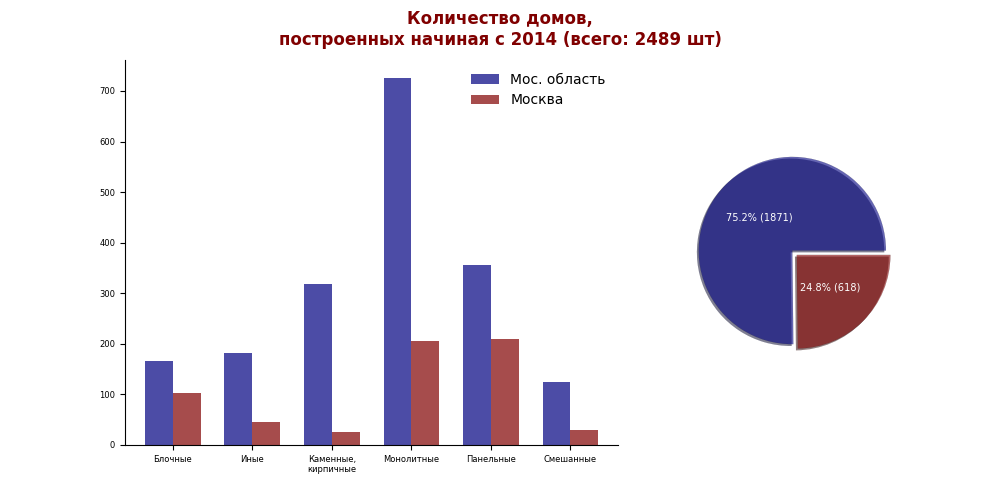

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gsp
import io

figHouses=plt.figure(figsize=(10, 5))
df_pl_h=pd.merge(grpmo, grpm, how='inner', left_index=True, right_index=True, suffixes=('_obl', '_mos'))
df_pl_h.rename(index=str, columns={'wall_type_obl':'Мос. область', 'wall_type_mos':'Москва'}, inplace=True)
df_pl_h.index=df_pl_h.index.str.replace(', ', ',\n')

#print(df_pl_h)
    
def plot_mos_mosobl_builds(fig, pdf, strTitle):
    def make_autopct(df_values):
        def my_funk(pct):
            total=df_values.sum()
            val=int(round(pct*total/100.0))
            return '{p:.1f}% ({v:d})'.format(p=pct, v=val)
        return my_funk


    gs=gsp.GridSpec(1, 2, width_ratios=[7, 3])

    ax_Pie=fig.add_subplot(gs[0, 1])
    ax_Bar=fig.add_subplot(gs[0, 0])

    

    df_pie=pdf[['Мос. область', 'Москва']].sum(axis=0)
    #print(df_pie.sum())
    pdf[['Мос. область', 'Москва']].plot.bar(stacked=False, ax=ax_Bar, width=0.7, 
                                           rot=0, fontsize=6, color=('navy', 'maroon'), alpha=0.7)
    df_pie.plot.pie(ax=ax_Pie, autopct=make_autopct(df_pie), radius=1.5,pctdistance=0.5,
                                        wedgeprops={'alpha':0.6, 'linewidth': 0.1, 
                                                    'edgecolor':'black'}, explode=(0.05, 0.05),
                                        shadow=True, colors=('navy', 'maroon'), 
                                        textprops={'weight': 'normal', 'fontsize':7, 'color':'white'})

    ax_Pie.axis('equal')
    ax_Pie.set_ylabel('')

    ax_Bar.legend_.set_frame_on(False)
    ax_Bar.legend_.set_title('')
    ax_Bar.spines['top'].set_visible(False)
    ax_Bar.spines['right'].set_visible(False)
    ax_Bar.set_xlabel('')
    
    fig.suptitle(strTitle.format(round(df_pie.sum()), i_start_year), 
                   fontsize=12, color='maroon', fontweight='bold')


plot_mos_mosobl_builds(figHouses, df_pl_h, 'Количество домов,\nпостроенных начиная с {1} (всего: {0} шт)')
plt.show();

In [ ]:
figSquares=plt.figure(figsize=(10, 5))
df_pl_sc=pd.merge(grpmo, grpm, how='inner', left_index=True, right_index=True, suffixes=('_obl', '_mos'))
df_pl_sc.rename(index=str, columns={'living_square_obl':'Мос. область', 'living_square_mos':'Москва'}, inplace=True)
df_pl_sc.index=df_pl.index.str.replace(', ', ',\n')

df_pl_sc[['Мос. область', 'Москва']]=df_pl_sc[['Мос. область', 'Москва']]*1e-6
#print(df_pl_sc)


plot_mos_mosobl_builds(figSquares, df_pl_sc, 'Жилая площадь,\nвведенная начиная с {1} (всего: {0} млн. м. кв.)')
plt.show();